## 图像灰度化原理

图像灰度化是将一幅彩色图像转换成灰度化图像的过程。彩色图像通常包括R、G、B三个分量，分别显示出红绿蓝等各种颜色，灰度化就是使彩色图像的R、G、B三个分量相等的过程。灰度图像中每个像素仅具有一种样本颜色，其灰度是位于黑色与白色之间的多级色彩，灰度值大的像素点比较亮，反之比较暗，像素值最大为255，表示白色，像素值最小为0，表示黑色。图像灰度化的核心思想是R=G=B。

|算法名称|算法公式|
| ---- | ---- |
|最大值灰度处理|Gray=max(R, G, B)|
|浮点灰度处理|Gray=R \* 0.3+G\*0.59+B\*0.11|
|整数灰度处理|Gray=(R\*30+G\*59+B\*11)/100|
|移位灰度处理|Gray=(R\*28+G\*151+B\*77)>>8|
|平均灰度处理|Gray=(r+g+b)/3|
|加权平均灰度处理|Gray=R\*0.299+G\*0.587+B\*0.144|

In [2]:
# 导入相关的包
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '../image/ImageSimilarity/lena.jpg'

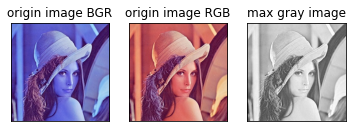

In [6]:
# 最大值灰度处理方法
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        gray = max(img[i,j][0], img[i,j][1], img[i,j][2])
        grayimg[i,j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

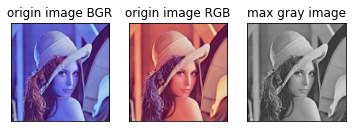

In [8]:
# 平均灰度处理方法
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        gray = (int(img[i,j][0])+int(img[i,j][1])+int(img[i,j][2]))/3
        grayimg[i,j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

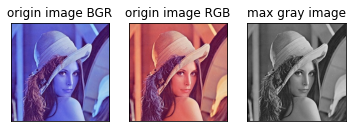

In [9]:
# 加权平均灰度处理方法
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        gray = 0.30 * img[i,j][0] + 0.59 * img[i,j][1] + 0.11 * img[i,j][2]
        grayimg[i,j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

## 图像灰度线性变换

图像的灰度线性变换是通过建立灰度映射来调整原始图像的灰度，从而改善图像的质量，凸显图像的细节，提高图像的对比度。灰度线性变换计算公式如下：
$$D_B = f(D_A)=aD_A+b$$

该公式中DB表示灰度线性变换后的灰度值，DA表示变换前输入图像的灰度值，$a$和$b$为线性变换方程$f(D)$的参数，分别表示斜率和截距。
- 当a=1，b=0时，保持原始图像
- 当a=1，b!=0时，图像所有的灰度值上移或下移
- 当a=-1，b=255时，原始图像的灰度值反转
- 当a>1时，输出图像的对比度增强
- 当$0<a<1$时,输出图像对比度减少
- 当a<0时，原始图像暗区域变亮，亮区域变暗，图像求补



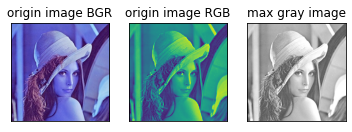

In [11]:
# 图像灰度上移变换
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        if (int(src[i, j] + 50) > 255):
            gray = 255
        else:
            gray = int(src[i, j] + 50)
        grayimg[i, j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

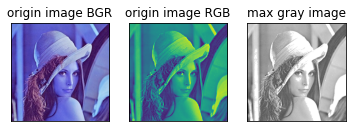

In [12]:
# 图像对比度增强
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        if (int(src[i, j] * 1.5) > 255):
            gray = 255
        else:
            gray = int(src[i, j] + 50)
        grayimg[i, j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

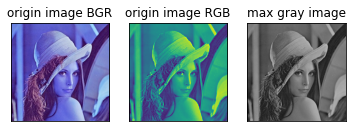

In [13]:
# 图像对比度减弱变换
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        if (int(src[i, j]  * 0.8) > 255):
            gray = 255
        else:
            gray = int(src[i, j]* 0.8)
        grayimg[i, j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

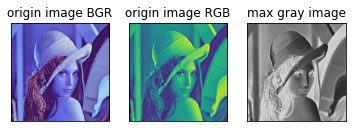

In [14]:
# 图像灰度反色变换
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        gray = 255 - src[i, j]
        grayimg[i, j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

## 图像灰度非线性变换

图像灰度非线性变换主要包括对数变换，幂次变换，指数变换，分段函数变换，通过非线性关系对图像进行灰度处理。

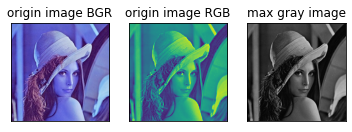

In [15]:
'''
图像灰度非线性变换：DB = DA*DA/255
'''
img = cv2.imread(image_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width, _ = img.shape

grayimg = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        gray = int(src[i, j]) * int(src[i, j]) / 255
        grayimg[i, j] = np.uint8(gray)
plt.subplot(1,3,1), plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title('origin image BGR')
plt.subplot(1,3,2), plt.imshow(src)
plt.xticks([]), plt.yticks([])
plt.title('origin image RGB')
plt.subplot(1,3,3), plt.imshow(grayimg)
plt.xticks([]), plt.yticks([])
plt.title('max gray image')
plt.show()

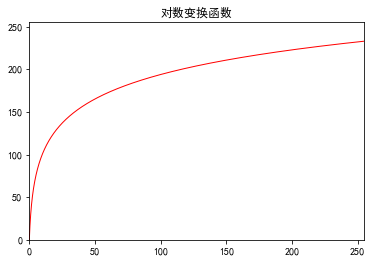

In [16]:
# 图像灰度对数变换
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
 
# 绘制曲线
def log_plot(c):
    x = np.arange(0, 256, 0.01)
    y = c * np.log(1 + x)
    plt.plot(x, y, 'r', linewidth=1)
    # 正常显示中文标签
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.title(u'对数变换函数')
    plt.xlim(0, 255), plt.ylim(0, 255)
    plt.show()
 
 
# 对数变换
def log(c, img):
    output = c * np.log(1.0 + img)
    output = np.uint8(output + 0.5)
    return output
 
 
# 读取原始图像
img = cv2.imread(image_path)
 
# 绘制对数变换曲线
log_plot(42)
 
# 图像灰度对数变换
result = log(42, img)
 
# 显示图像
cv2.imshow("Image", img)
cv2.imshow("Result", result)
 
# 等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 图像灰度伽马变换
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
 
# 绘制曲线
def gamma_plot(c, gamma):
    x = np.arange(0, 256, 0.01)
    # y = c * x ** gamma
    y = c * np.power(x, gamma)
    plt.plot(x, y, 'r', linewidth=1)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
    plt.title(u'伽马变换函数')
    plt.xlim([0, 255]), plt.ylim([0, 255])
    plt.show()
 
 
# 伽玛变换
def gamma(img, c, gamma):
    # 映射表必须为0~255(改成其他会报错）
    gamma_table = c * [np.power(x/255.0, gamma) * 255.0 for x in range(256)]
    # Numpy数组默认数据类型为 int32，需要将数据类型转换为opencv图像适合使用的无符号八位整形
    # round() 方法返回浮点数x的四舍五入值。
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    output_img = cv2.LUT(img, gamma_table)
    return output_img
 
def gamma_1(img, c, gamma):
    # 映射表必须为0~255(改成其他会报错）
    output_img = c * np.power(img / float(np.max(img)), gamma) * 255.0
    output_img = np.uint8(output_img)
    return output_img
 
 
# 读取原始图像
img = cv2.imread(image_path)
 
# 将图像转换为灰度，我们需要使用灰度图做gamma矫正
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# 绘制伽玛变换曲线
gamma_plot(1, 4.0)
 
# 图像灰度伽玛变换
result = gamma(gray, 1, 0.4)
result1 = gamma_1(gray, 1, 0.4)
 
# 显示图像
cv2.imshow("Image", img)
cv2.imshow("Result", result)
cv2.imshow("Result 1", result1)
 
# 等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()